# Weather impact on noise values

This notebok describes code used to investigate any possible relationship between sound level recording data in Dublin and weather data from 2015 to 2021.

Historical weather data downloaded from https://www.met.ie/climate/available-data/historical-data between 2015 and 2021. 

Met éireann uses this key for weather data 

date:  -  Date and Time (utc)	
"rain:  -  Precipitation Amount (mm)	  "	
"temp:  -  Air Temperature (C)	"	
wetb:  -  Wet Bulb Temperature (C)	
dewpt: -  Dew Point Temperature (C)             	
rhum:  -  Relative Humidity (%)	
"vappr: -  Vapour Pressure (hPa)	 "	
msl:   -  Mean Sea Level Pressure (hPa)	
wdsp:  -  Mean Wind Speed (knot)	
wddir: -  Predominant Wind Direction (degree)	
ww:    -  Synop code for Present Weather	
w:     -  Synop code for Past Weather	
sun:   -  Sunshine duration (hours)	
vis:   -  Visibility (m)	
clht:  -  Cloud height (100's of ft) - 999 if none 	
clamt: -  Cloud amount	
ind:   -  Indicator

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import scipy

In [2]:
# import dataframes to be merged

noise = pd.read_csv('../Data/datasets/2015_2021noise_pollution_Cleaned.csv', sep = '\t', parse_dates=['datetime'])
weather = pd.read_csv('../Data/datasets/2015to2021_weather.csv', sep = '\t', parse_dates=['datetime'])

# merge the dataframes together using pandas merge
hourly_merge = pd.merge(noise, weather, on='datetime')

In [3]:
# drop some unwanted columns that are not needed for this

hourly_merge.drop(columns=['month', 'day_of_month', 'day_of_week', 'hour_of_day', 'day_name',
       'date', 'part_of_week'], inplace = True)

In [4]:
# look at dataframe columns 
hourly_merge.columns

Index(['datetime', 'laeq_BullIsland2', 'laeq_Ballyferm3', 'laeq_Ballymun4',
       'laeq_DCCRowingClub5', 'laeq_NavanRoad8', 'laeq_Raheny9',
       'laeq_ChanceryPark11', 'laeq_BlessingtonBasin12', 'laeq_DolphinsBarn13',
       'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp',
       'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt'],
      dtype='object')

In [5]:
# have a look at the coefficient correlation matrix
hourly_merge.corr()

,laeq_BullIsland2,laeq_Ballyferm3,laeq_Ballymun4,laeq_DCCRowingClub5,laeq_NavanRoad8,laeq_Raheny9,laeq_ChanceryPark11,laeq_BlessingtonBasin12,laeq_DolphinsBarn13,rain,...,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt
laeq_BullIsland2,1.000000,0.358254,0.252301,0.456508,0.401115,0.336852,0.253345,0.439984,0.311898,0.089636,...,-0.093165,-0.255213,0.372485,-0.074357,0.170234,0.195508,0.059282,-0.093667,-0.085292,0.086635
laeq_Ballyferm3,0.358254,1.000000,0.652556,0.738547,0.722299,0.751212,0.633403,0.635387,0.753689,0.074103,...,-0.188846,-0.126282,0.292874,0.058273,0.101394,0.140382,0.171321,0.040302,-0.065977,0.067761
laeq_Ballymun4,0.252301,0.652556,1.000000,0.629588,0.551871,0.706516,0.543583,0.544471,0.687512,0.019479,...,-0.235988,-0.028802,0.141716,-0.028370,0.031893,0.066621,0.193496,0.091546,-0.034523,0.027165
laeq_DCCRowingClub5,0.456508,0.738547,0.629588,1.000000,0.686984,0.740089,0.610082,0.648985,0.713958,0.065854,...,-0.252241,-0.135334,0.265621,-0.069341,0.099113,0.131920,0.205037,0.054402,-0.079240,0.078831
laeq_NavanRoad8,0.401115,0.722299,0.551871,0.686984,1.000000,0.628879,0.529447,0.582619,0.633201,0.068054,...,-0.140252,-0.156657,0.283789,0.103069,0.092870,0.133062,0.124640,0.033247,-0.053279,0.056944
laeq_Raheny9,0.336852,0.751212,0.706516,0.740089,0.628879,1.000000,0.634375,0.627273,0.772575,0.088032,...,-0.209789,-0.102405,0.179430,-0.064982,0.110318,0.132462,0.196537,0.029105,-0.085593,0.089374
laeq_ChanceryPark11,0.253345,0.633403,0.543583,0.610082,0.529447,0.634375,1.000000,0.538493,0.613229,0.055912,...,-0.182762,-0.085352,0.190765,-0.018302,0.082558,0.104142,0.193073,0.012791,-0.074523,0.078410
laeq_BlessingtonBasin12,0.439984,0.635387,0.544471,0.648985,0.582619,0.627273,0.538493,1.000000,0.657661,0.034562,...,-0.306483,-0.129289,0.290575,0.036640,0.063624,0.105383,0.281873,0.107577,-0.071313,0.061187
laeq_DolphinsBarn13,0.311898,0.753689,0.687512,0.713958,0.633201,0.772575,0.613229,0.657661,1.000000,0.031510,...,-0.261910,-0.079716,0.211181,0.019175,0.053856,0.087151,0.210149,0.095281,-0.045756,0.042683
rain,0.089636,0.074103,0.019479,0.065854,0.068054,0.088032,0.055912,0.034562,0.031510,1.000000,...,0.196169,-0.200174,0.069286,-0.068897,0.422533,0.310848,-0.095817,-0.255037,-0.137990,0.182737


Text(0.5, 1.0, 'Correlation Matrix for Monitor Sound and Weather')

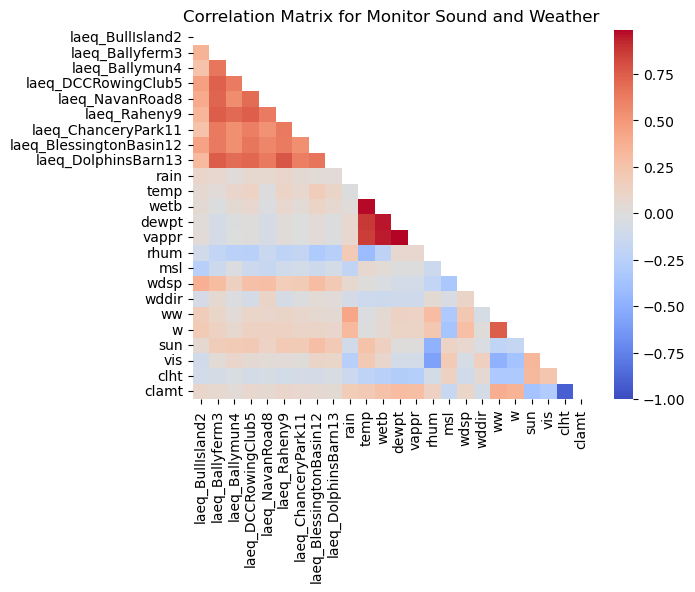

In [6]:
# look at heatmap of correlation matrix for better overview

correlation_weather = hourly_merge.corr()

#mask half of heatmap
mask = np.zeros_like(correlation_weather, dtype=bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(hourly_merge.corr(), vmin=-1,
            cmap='coolwarm', mask = mask)

plt.title('Correlation Matrix for Monitor Sound and Weather')

It looks like most of the weather data does not have a high level of correlation with the hourly datapoints.

The highest level of correlation is seen with 'windspeed' and the LAeq noise monitor on Bull Island.

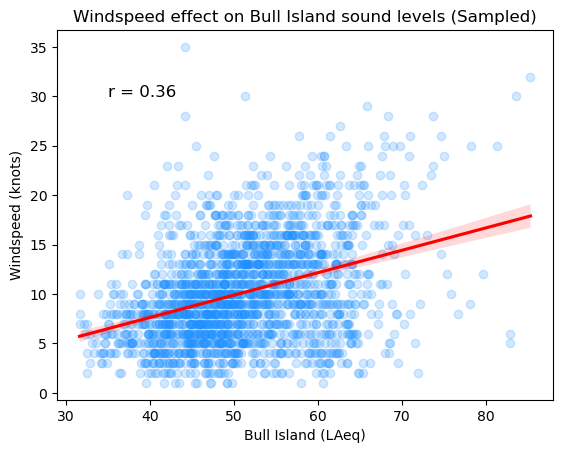

In [7]:
# look at a scatter plot of possible windspeed effect on noise on Bull Island

# will take a sample of the data because it is quite large and the scatterplot will be very dense, setting random state for reproducibility

df_sample = hourly_merge.sample(2000, random_state=5)

# plot the Bull Island noise values on X axis and the windspeed values for Dublin on Y axis

p = sns.regplot(data = df_sample, x = 'laeq_BullIsland2', y = 'wdsp', scatter_kws={"color": "dodgerblue", "alpha": 0.2}, line_kws={"color": "red"}, )
plt.xlabel('Bull Island (LAeq)')
plt.ylabel('Windspeed (knots)')
plt.title('Windspeed effect on Bull Island sound levels (Sampled)')


# show correlation-coefficient, r-value, on the plot
xs = df_sample['laeq_BullIsland2']
ys = df_sample['wdsp']
slope, intercept, r, p, sterr = scipy.stats.linregress(xs, ys)

# Text annotation add r-value at x = 60 , y = 30           
plt.text(35, 30, 'r = {:.2f}'.format(r), fontsize = 12)

plt.show()



# Effect of Storm Emma on Noise Values

'Beast from the East' storm Emma arrived in 27th/28th February to the 4th March 2018 and resulted in heavy snowfall.

Here the difference in mean average noise during the storm and average noise for the whole dataset is calculated and plotted.

Text(0.5, 1.0, 'Difference in average noise during Storm Emma')

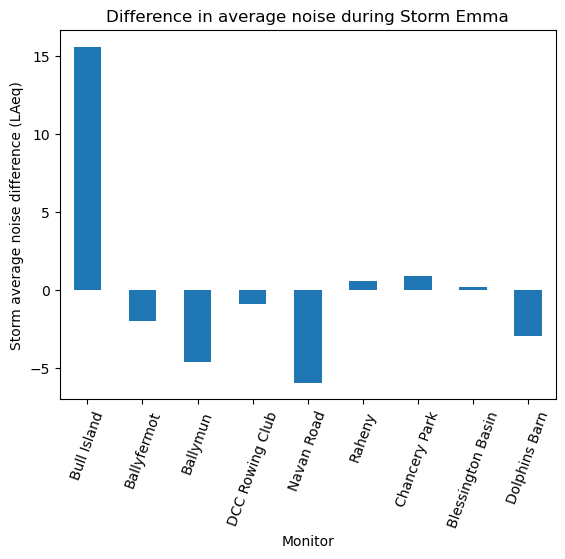

In [8]:
# set index of the dataframe to 'datetime'

hourly_merge.set_index(hourly_merge["datetime"], inplace=True)

# generate a new dataframe within the dates of the storm

df_storm = hourly_merge.loc['2018-02-28':'2018-03-01']

# generate another dataframe with the difference between the storm noise data and the average mean data from the whole timeframe 

# make a dictionary of the differences
storm_difference = {'Storm mean difference': df_storm.mean(numeric_only=True) - hourly_merge.mean(numeric_only=True)}

# make a dataframe using this dictionary
storm_difference_df = pd.DataFrame(storm_difference)

# Get rid of some rows to plot a bar chart with just the noise monitor data
storm_difference = storm_difference_df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8]].copy()

# rename monitor index for plotting to be clearer
storm_difference.rename(index={'laeq_BullIsland2': 'Bull Island','laeq_Ballyferm3': 'Ballyfermot', 'laeq_Ballymun4': 'Ballymun', 'laeq_DCCRowingClub5': 'DCC Rowing Club', 'laeq_NavanRoad8': 'Navan Road', 'laeq_Raheny9': 'Raheny', 'laeq_ChanceryPark11':'Chancery Park', 'laeq_BlessingtonBasin12':'Blessington Basin', 'laeq_DolphinsBarn13': 'Dolphins Barn'}, inplace=True)
# plot the data on a bar chart
ax = storm_difference.plot(kind='bar', legend=False)
ax.set_xlabel("Monitor")
ax.set_ylabel("Storm average noise difference (LAeq)")
plt.xticks(rotation=70)
plt.title('Difference in average noise during Storm Emma')